In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from mpl_toolkits.basemap import Basemap
from palettable.colorbrewer.sequential import YlOrRd_5
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

In [2]:
#df = pd.read_csv('../log/acq19700101000655.csv')
column_names = ['nrow', 'loramac_rcx', 'gps_time', 'lat', 'lon',
                'alt', 'nb_sent', 'loramac_trx', 'crc_trx', 'crc_rcx',
                'crc_status', 'lora_ts', 'rssi', 'snr', 'sf', 'crc_row'] 

df = pd.read_csv('../log/clean.csv', header=None, names = column_names, parse_dates=True, index_col=2)

NameError: name 'pd' is not defined

In [85]:
df.head()

,nrow,loramac_rcx,lat,lon,alt,nb_sent,loramac_trx,crc_trx,crc_rcx,crc_status,lora_ts,rssi,snr,sf,crc_row
gps_time,,,,,,,,,,,,,,,
2017-05-19 08:52:51,0,70b3d54993208829,45.70369,13.72006,59.45,9,70b3d5499ea1e804,0xbf,0xbf,True,416811890,-40,28,7,0x60
2017-05-19 08:52:52,1,70b3d54993208829,45.70369,13.72006,59.45,10,70b3d5499ea1e804,0x50,0x50,True,418880913,-39,28,7,0x43
2017-05-19 08:52:53,2,70b3d54993208829,45.70369,13.72006,59.45,68,70b3d5499ea1e804,0x56,0x56,True,418880913,-39,28,7,0xcc
2017-05-19 08:52:54,3,70b3d54993208829,45.70369,13.72006,59.45,69,70b3d5499ea1e804,0x34,0x34,True,420949938,-43,28,7,0x2d
2017-05-19 08:52:56,4,70b3d54993208829,45.70369,13.72006,59.45,70,70b3d5499ea1e804,0xb4,0xb4,True,423018961,-37,26,7,0xdf


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 718 entries, 2017-05-19 08:52:51 to 2017-05-19 09:17:50
Data columns (total 15 columns):
nrow           718 non-null int64
loramac_rcx    718 non-null object
lat            718 non-null float64
lon            718 non-null float64
alt            718 non-null float64
nb_sent        718 non-null int64
loramac_trx    718 non-null object
crc_trx        718 non-null object
crc_rcx        718 non-null object
crc_status     718 non-null bool
lora_ts        718 non-null int64
rssi           718 non-null int64
snr            718 non-null int64
sf             718 non-null int64
crc_row        718 non-null object
dtypes: bool(1), float64(3), int64(6), object(5)
memory usage: 84.8+ KB


In [87]:
df.describe()

,nrow,lat,lon,alt,nb_sent,lora_ts,rssi,snr,sf
count,718.000000,718.000000,718.000000,718.000000,718.000000,7.180000e+02,718.000000,718.000000,718.0
mean,358.500000,45.703696,13.720073,59.222981,428.878830,1.165899e+09,-36.955432,27.417827,7.0
std,207.413034,0.000020,0.000018,1.231839,210.721443,4.353787e+08,2.152023,1.360251,0.0
min,0.000000,45.703690,13.720060,53.450000,9.000000,4.168119e+08,-47.000000,23.000000,7.0
25%,179.250000,45.703690,13.720070,59.450000,248.250000,7.918293e+08,-39.000000,27.000000,7.0
50%,358.500000,45.703690,13.720070,59.450000,428.500000,1.164782e+09,-37.000000,27.000000,7.0
75%,537.750000,45.703690,13.720080,59.450000,611.750000,1.543939e+09,-36.000000,28.000000,7.0
max,717.000000,45.703810,13.720210,65.450010,792.000000,1.916896e+09,-31.000000,33.000000,7.0


In [ ]:
df = df.loc[df['is_valid'] == True,

In [67]:
df.columns = ['time', 'lat', 'lon', 'is_valid', 'rssi', 'snr']

In [89]:
df = df.loc[df['crc_status'] == True,] # keep only valid 

In [91]:
df.drop('crc_status', axis=1, inplace=True)

In [92]:
df.head()

,nrow,loramac_rcx,lat,lon,alt,nb_sent,loramac_trx,crc_trx,crc_rcx,lora_ts,rssi,snr,sf,crc_row
gps_time,,,,,,,,,,,,,,
2017-05-19 08:52:51,0,70b3d54993208829,45.70369,13.72006,59.45,9,70b3d5499ea1e804,0xbf,0xbf,416811890,-40,28,7,0x60
2017-05-19 08:52:52,1,70b3d54993208829,45.70369,13.72006,59.45,10,70b3d5499ea1e804,0x50,0x50,418880913,-39,28,7,0x43
2017-05-19 08:52:53,2,70b3d54993208829,45.70369,13.72006,59.45,68,70b3d5499ea1e804,0x56,0x56,418880913,-39,28,7,0xcc
2017-05-19 08:52:54,3,70b3d54993208829,45.70369,13.72006,59.45,69,70b3d5499ea1e804,0x34,0x34,420949938,-43,28,7,0x2d
2017-05-19 08:52:56,4,70b3d54993208829,45.70369,13.72006,59.45,70,70b3d5499ea1e804,0xb4,0xb4,423018961,-37,26,7,0xdf


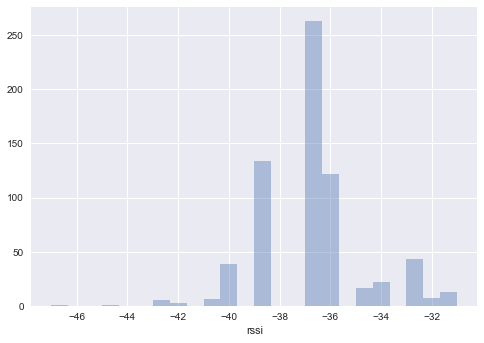

In [109]:
sns.distplot(df['rssi'], kde=False)
plt.show()

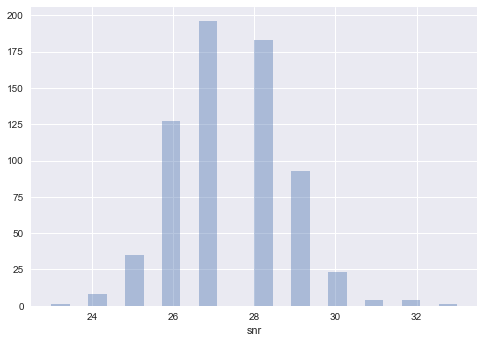

In [110]:
sns.distplot(df['snr'], kde=False)
plt.show()

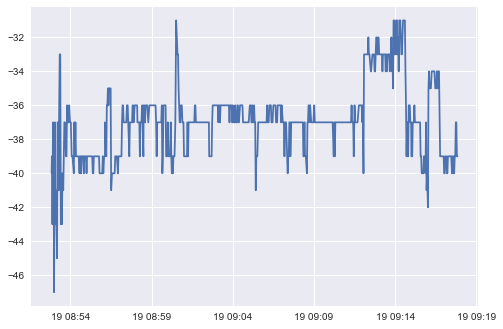

In [103]:
plt.plot(df['rssi'])
plt.show()

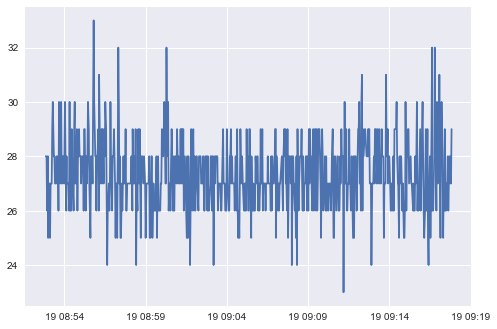

In [111]:
plt.plot(df['snr'])
plt.show()

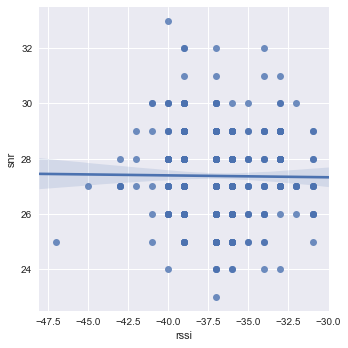

In [107]:
sns.lmplot(x="rssi", y="snr", data=df)
plt.show()

## Maps

In [113]:
# Convert to geo-dataframe
df['geometry'] = df.apply(lambda z: Point(z.lat, z.lon), axis=1)
df = gpd.GeoDataFrame(df)

In [145]:
# Get bounding box
df.crs = {'init' :'epsg:4326'}
bounds = df.total_bounds
bounds

(45.703690000000002, 13.72006, 45.703809999999997, 13.72021)

In [164]:
#bounds = (13.72,45.703,13.73,45.704)
bounds = (45.701524, 13.710536, 45.706477, 13.717435)
bounds = (45.701, 13.7, 45.71, 13.72)

http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/export?bbox=13.7,45.701,13.72,45.71&bboxSR=4326&imageSR=4326&size=400,179&dpi=600&format=png32&f=image


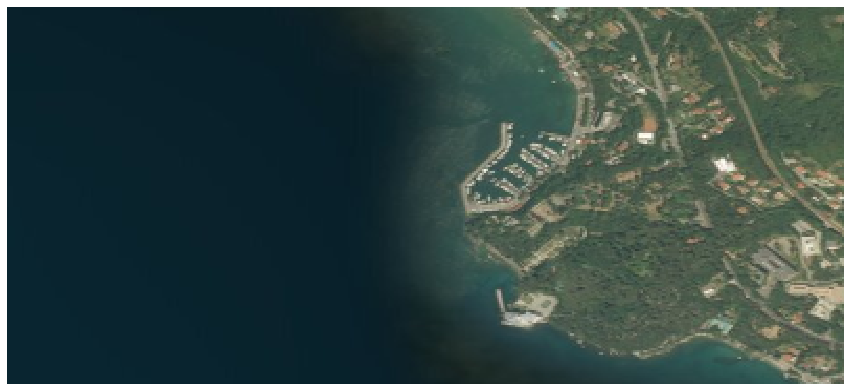

In [167]:
#plt.rcParams["figure.figsize"] = [15, 15]
map = Basemap(llcrnrlon=bounds[1],llcrnrlat=bounds[0],
              urcrnrlon=bounds[3],urcrnrlat=bounds[2], 
              epsg=4326)

#map.hexbin(df.lon.values, df.lat.values, C = df.rssi.values, 
#           reduce_C_function = max, gridsize=100, 
#           mincnt=1, cmap=YlOrRd_5.mpl_colormap, 
#           linewidths=0.5, edgecolors='none')

#map.colorbar(location='bottom', label='RSSI (dB)')
#map.arcgisimage(service='ESRI_Imagery_World_2D', dpi=300, verbose= True)
#map.arcgisimage(service='ESRI_StreetMap_World_2D', dpi=500, verbose= True)

map.arcgisimage(service='World_Imagery', dpi=600, verbose= True)
#map.arcgisimage(service='ESRI_StreetMap_World_2D', dpi=600, verbose= True)




plt.show()

In [169]:
# Clarifying decoding
t = b'abc'

In [170]:
type(t)

str

In [173]:
class(b'xyzzy')

SyntaxError: invalid syntax (<ipython-input-173-9806553b16ff>, line 1)

In [174]:
import datetime
import json
import requests
import pandas as pd

In [185]:
numdays = 5
base = datetime.date.today()
CHANNEL_ID = 60917

In [213]:
import datetime
import json
import requests
import pandas as pd

numdays = 5 # last 5 days
base = datetime.date.today()
CHANNEL_ID = 60917

# url template
url_tpl = 'http://api.thingspeak.com/channels/{}/feeds.json?&end={}&start={}' 

feeds=[]

for i in range(0, numdays):
    end = base - datetime.timedelta(days=i)
    start = base - datetime.timedelta(days=i+1)
    url = url_tpl.format(CHANNEL_ID, end, start)
    d = json.loads(requests.get(url).text)
    feeds.extend(d["feeds"])
   
df = pd.DataFrame(feeds)
print(df.shape)
df.head()

(2420, 10)


,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8
0,2017-05-20T00:00:58Z,249546,16.14,1005.00,78.21,4172,2.17,45,0,0.00
1,2017-05-20T00:02:10Z,249547,16.27,1005.00,76.82,4172,1.80,37,0,0.00
2,2017-05-20T00:03:21Z,249548,16.49,1005.00,75.63,4177,1.85,261,0,0.00
3,2017-05-20T00:04:32Z,249549,16.63,1005.00,74.98,4172,2.18,48,0,0.00
4,2017-05-20T00:05:43Z,249550,16.69,1005.00,74.88,4172,2.40,41,0,0.00


In [196]:
r = requests.get('http://api.thingspeak.com/channels/60917/feeds.json?&end=2017-05-23&start=2017-05-22')

In [197]:
r.text

u'{"channel":{"id":60917,"name":"WS_TPH_WEE_LP_Roof","description":"Weather Station using Mbili board (Arduino) with Wee wifibee board. TPH sensor for pressure humidity and temperature, 3D printed wind speed, wind direction and tipping bucket. Updated every minute. Located on the Galileos Roof","latitude":"45.703809","longitude":"13.720152","field1":"Temperature WS","field2":"Pressure WS","field3":"Humidity WS","field4":"Voltage WS","field5":"Wind RPM WS","field6":"Wind direction WS","field7":"Rain bucket WS","field8":"Rain hour mm","created_at":"2015-10-16T16:54:28Z","updated_at":"2017-05-20T13:57:58Z","elevation":"60","last_entry_id":250104},"feeds":[]}'

In [198]:
d = json.load(requests.get('http://api.thingspeak.com/channels/60917/feeds.json?&end=2017-05-23&start=2017-05-22').text)

AttributeError: 'unicode' object has no attribute 'read'

In [190]:
type(url)

str

In [199]:
d = requests.get('http://api.thingspeak.com/channels/60917/feeds.json?&end=2017-05-23&start=2017-05-22')

In [209]:
json.loads(d.text)['feeds']

[]

In [214]:
10000 / 700

14